In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv('car_price_data.csv')

In [3]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [4]:
data.shape

(4345, 9)

# Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [6]:
df= pd.DataFrame(data)

In [7]:
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [8]:
df['Brand'].value_counts()

Brand
Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
Renault          469
Audi             457
Mitsubishi       327
Name: count, dtype: int64

In [9]:
df['Body'].value_counts()

Body
sedan        1649
crossover     901
van           675
other         433
vagon         402
hatch         285
Name: count, dtype: int64

In [10]:
df['Engine Type'].value_counts()

Engine Type
Diesel    2019
Petrol    1559
Gas        613
Other      154
Name: count, dtype: int64

In [11]:
df['Model'].nunique()

312

# Drop columns

Since the model column is having 312 unique values hence applying one hot encoding will lead to large no. of columns which will not be faverable hence we will drop it

In [12]:
df.drop('Model',axis=1,inplace=True)

In [13]:
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


# Check missing values

In [14]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Columns with null values: Price || EngineV

In [15]:
# we will drop these nan values though it is not always recommended to drop but we can drop data less than 5%
df_na=df.dropna()

In [16]:
df_na.shape

(4025, 8)

# Data Exploration

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6080\1328498351.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_na['Price'])


Text(0.5, 1.0, 'Price distribution')

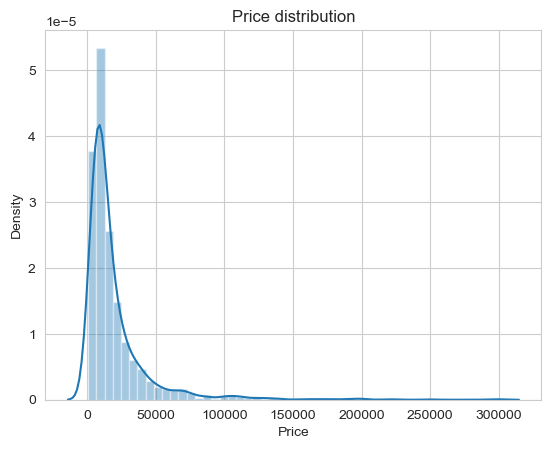

In [18]:
# plt.figure(figsize=[9,6])
sns.distplot(df_na['Price'])
plt.title('Price distribution')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6080\988352524.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_na['Mileage'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_6080\988352524.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_na['EngineV'])
C:\Users\Admin\AppData\Local\Temp\ipyk

Text(0.5, 1.0, 'Year Distribution')

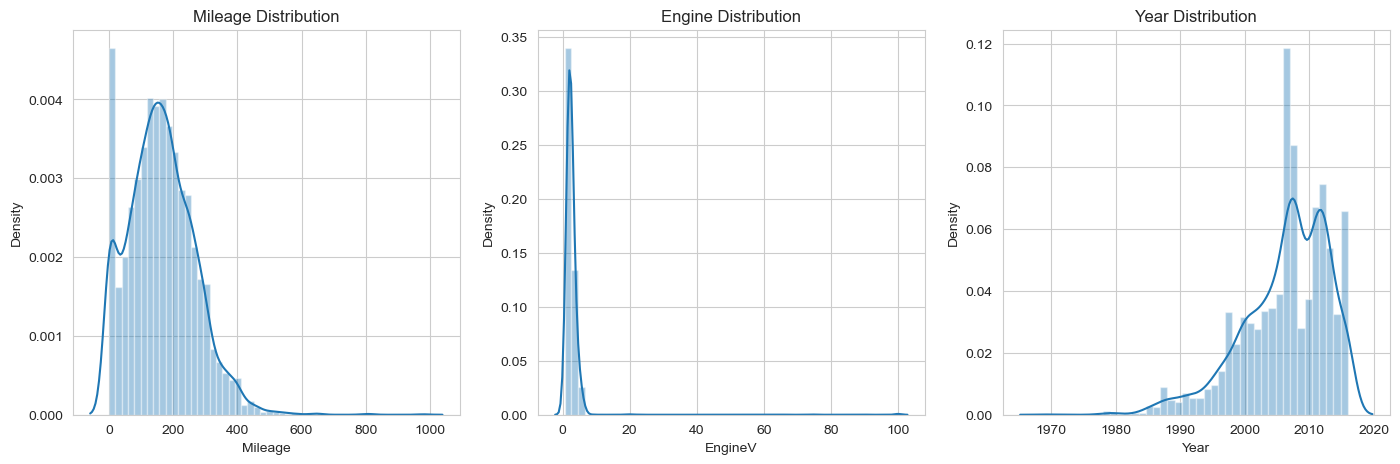

In [19]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(df_na['Mileage'])
plt.title('Mileage Distribution')

plt.subplot(1,3,2)
sns.distplot(df_na['EngineV'])
plt.title('Engine Distribution')

plt.subplot(1,3,3)
sns.distplot(df_na['Year'])
plt.title('Year Distribution')

Make the PDF graph helps to study the distribution i.e., normally distributed, right or left skewed. It helps to find the outliers also

In [20]:
print(df_na['Price'].skew())
print(df_na['Mileage'].skew())
print(df_na['EngineV'].skew())
print(df_na['Year'].skew())
#if value is close to zero that means it is almost normal distribution

4.444408950170787
0.7001960905211981
17.154961725736293
-0.9639453013469816


Text(0.5, 1.0, 'Year Boxplot')

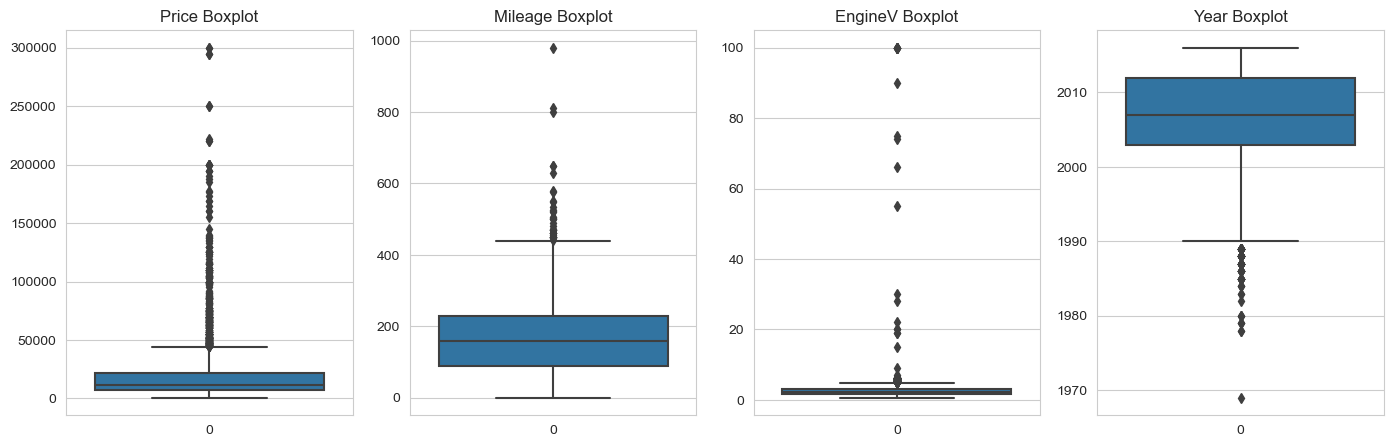

In [21]:
plt.figure(figsize=[17,5])
plt.subplot(1,4,1)
sns.boxplot(df_na['Price'])
plt.title('Price Boxplot')

plt.subplot(1,4,2)
sns.boxplot(df_na['Mileage'])
plt.title('Mileage Boxplot')

plt.subplot(1,4,3)
sns.boxplot(df_na['EngineV'])
plt.title('EngineV Boxplot')

plt.subplot(1,4,4)
sns.boxplot(df_na['Year'])
plt.title('Year Boxplot')

# Handling Outliers using IQR

In [22]:
# Price
percentile75_p= df_na['Price'].quantile(0.75)
percentile25_p= df_na['Price'].quantile(0.25)

In [23]:
iqr_p= percentile75_p - percentile25_p

In [24]:
upper_limit_p= percentile75_p + 1.5*iqr_p
lower_limit_p= percentile25_p - 1.5*iqr_p

In [25]:
df_na[df_na['Price']>upper_limit_p]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016
37,BMW,67500.0,crossover,1,2.5,Diesel,yes,2016
41,Mercedes-Benz,63000.0,crossover,86,5.5,Petrol,yes,2009
62,BMW,133000.0,crossover,7,4.4,Petrol,yes,2015
64,Mercedes-Benz,50000.0,sedan,240,3.5,Petrol,yes,2006
...,...,...,...,...,...,...,...,...
4318,Mercedes-Benz,300000.0,other,37,5.0,Petrol,yes,2012
4322,Toyota,100000.0,crossover,0,4.5,Diesel,yes,2016
4327,Audi,80999.0,crossover,0,3.0,Diesel,yes,2016
4331,BMW,45000.0,crossover,80,3.0,Petrol,yes,2011


In [26]:
df_na[df_na['Price']<lower_limit_p]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year


In [27]:
# Since the outliers are soo many we cannot just trim them, instead we will apply capping
new_df= df_na.copy()
new_df['Price']= np.where(df_na['Price']>upper_limit_p, upper_limit_p,
                        np.where(df_na['Price']<lower_limit_p,lower_limit_p,
                                df_na['Price']))

In [28]:
# Mileage
percentile75_m= df_na['Mileage'].quantile(0.75)
percentile25_m= df_na['Mileage'].quantile(0.25)

In [29]:
iqr_m= percentile75_m - percentile25_m

In [30]:
upper_m= percentile75_m + iqr_m * 1.5
lower_m= percentile25_m - 1.5 * iqr_m

In [31]:
df_na[df_na['Mileage']>upper_m]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
258,Volkswagen,2500.0,sedan,488,2.0,Petrol,yes,1991
284,Renault,4900.0,van,472,2.5,Diesel,yes,2000
396,Mercedes-Benz,2650.0,sedan,470,2.0,Gas,yes,1985
899,Volkswagen,6500.0,other,547,1.9,Diesel,yes,1998
922,Volkswagen,5200.0,van,442,2.4,Diesel,yes,1992
1198,Volkswagen,8700.0,other,520,2.5,Diesel,yes,1999
1393,Toyota,2700.0,sedan,550,1.6,Gas,yes,1989
1410,Volkswagen,4900.0,sedan,500,1.9,Diesel,yes,1995
1813,Mercedes-Benz,8500.0,van,630,2.9,Diesel,yes,1998
2043,Mercedes-Benz,3800.0,van,462,2.2,Diesel,no,2001


In [32]:
df_na[df_na['Mileage']<lower_m]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year


In [33]:
new_df['Mileage']= np.where(df_na['Mileage']>upper_m, upper_m,
                             
                            df_na['Mileage'])

In [34]:
# EngineV
percentile75_e= df_na['EngineV'].quantile(0.75)
percentile25_e= df_na['EngineV'].quantile(0.25)

In [35]:
iqr_e= percentile75_e - percentile25_e

In [36]:
upper_e= percentile75_e + iqr_e * 1.5
lower_e= percentile25_e - 1.5 * iqr_e

In [37]:
df_na[df_na['EngineV']>upper_e]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016
41,Mercedes-Benz,63000.0,crossover,86,5.5,Petrol,yes,2009
48,Mercedes-Benz,29500.0,sedan,134,5.0,Petrol,yes,2008
53,Mercedes-Benz,13500.0,sedan,317,5.0,Petrol,yes,2001
...,...,...,...,...,...,...,...,...
4265,Mercedes-Benz,27500.0,crossover,152,6.3,Petrol,yes,2007
4278,Mercedes-Benz,29500.0,crossover,253,5.0,Petrol,yes,2003
4297,Mercedes-Benz,24500.0,sedan,163,5.5,Gas,yes,2007
4303,Mercedes-Benz,12000.0,sedan,298,5.0,Petrol,yes,2004


In [38]:
df_na[df_na['EngineV']<lower_e]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year


In [39]:
new_df['EngineV']= np.where(df_na['EngineV']>upper_e, upper_e,
                             
                            df_na['EngineV'])

In [40]:
# Year
percentile75_y= df_na['Year'].quantile(0.75)
percentile25_y= df_na['Year'].quantile(0.25)

In [41]:
iqr_y= percentile75_y - percentile25_y

In [42]:
upper_y= percentile75_y + iqr_y * 1.5
lower_y= percentile25_y - 1.5 * iqr_y

In [43]:
df_na[df_na['Year']>upper_y]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year


In [44]:
df_na[df_na['Year']<lower_y]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
30,Audi,2900.00,sedan,1,2.3,Gas,yes,1989
46,Mitsubishi,2500.00,sedan,220,2.4,Petrol,yes,1987
98,BMW,4099.00,sedan,50,2.5,Petrol,yes,1988
141,Audi,600.00,sedan,112,1.6,Petrol,yes,1980
217,Volkswagen,1800.00,other,300,1.3,Petrol,yes,1989
...,...,...,...,...,...,...,...,...
4161,Mercedes-Benz,2500.00,sedan,200,2.3,Gas,yes,1986
4234,Volkswagen,1296.75,sedan,1,1.6,Petrol,yes,1980
4319,Mercedes-Benz,5500.00,sedan,440,2.0,Petrol,yes,1978
4329,Volkswagen,2200.00,hatch,400,1.3,Other,yes,1987


In [45]:
new_df['Year']= np.where(df_na['Year']>upper_y, upper_y,
            np.where(df_na['Year']<lower_y, lower_y,
                             df_na['Year']))

<Axes: >

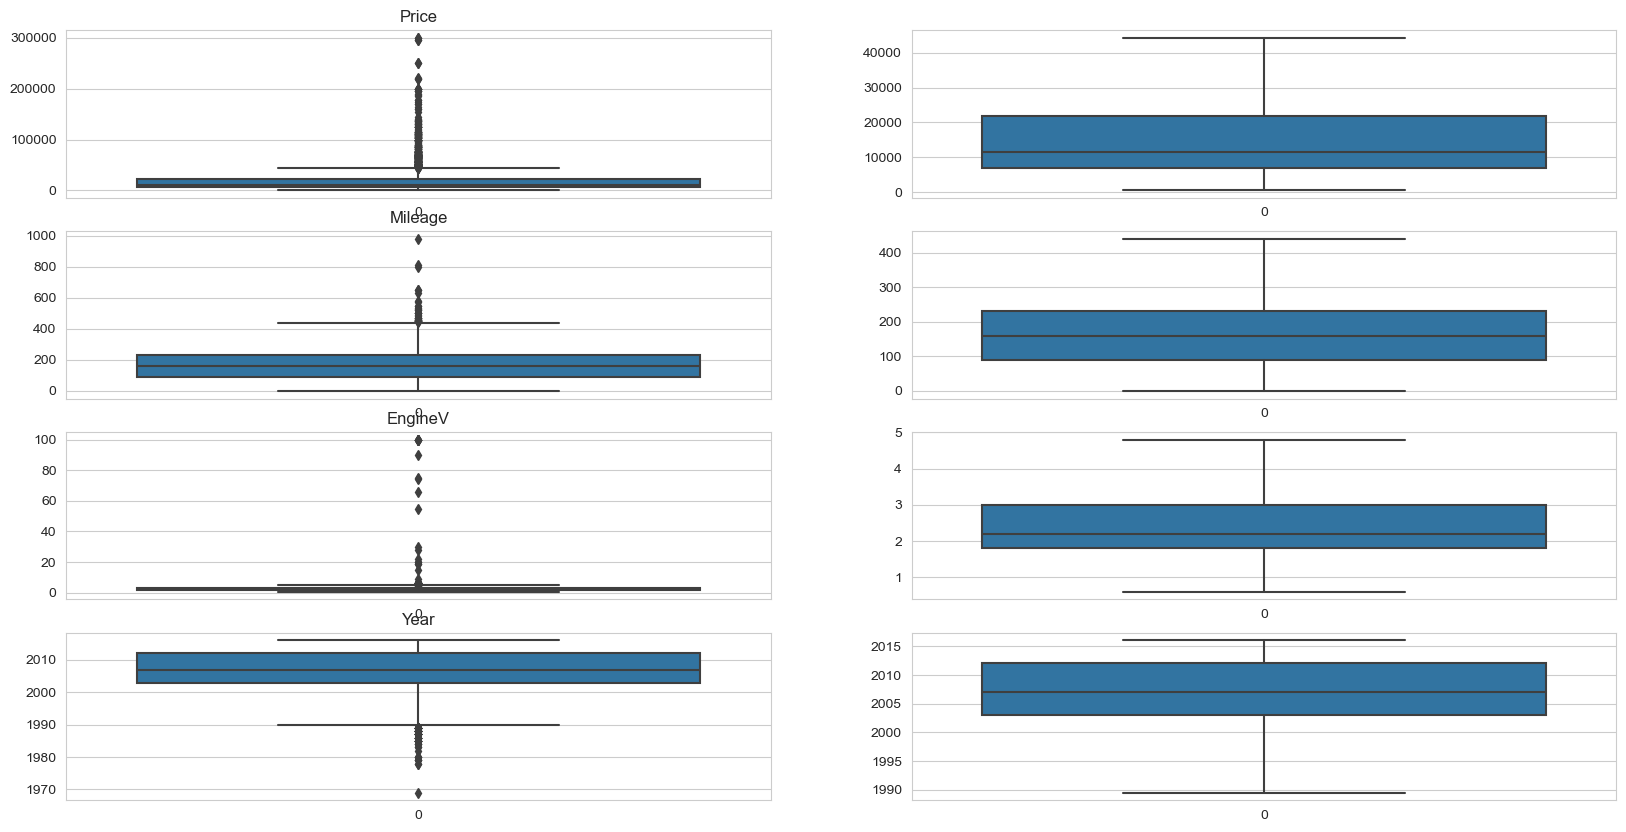

In [46]:
plt.figure(figsize=(20,10))
plt.subplot(4,2,1)
sns.boxplot(df_na['Price'])
plt.title('Price')
plt.subplot(4,2,2)
sns.boxplot(new_df['Price'])

plt.subplot(4,2,3)
sns.boxplot(df_na['Mileage'])
plt.title('Mileage')
plt.subplot(4,2,4)
sns.boxplot(new_df['Mileage'])

plt.subplot(4,2,5)
sns.boxplot(df_na['EngineV'])
plt.title('EngineV')
plt.subplot(4,2,6)
sns.boxplot(new_df['EngineV'])

plt.subplot(4,2,7)
sns.boxplot(df_na['Year'])
plt.title('Year')
plt.subplot(4,2,8)
sns.boxplot(new_df['Year'])

# Checking Linearity using ScatterPlot

<Axes: title={'center': 'Price and Mileage'}, xlabel='Mileage', ylabel='Price'>

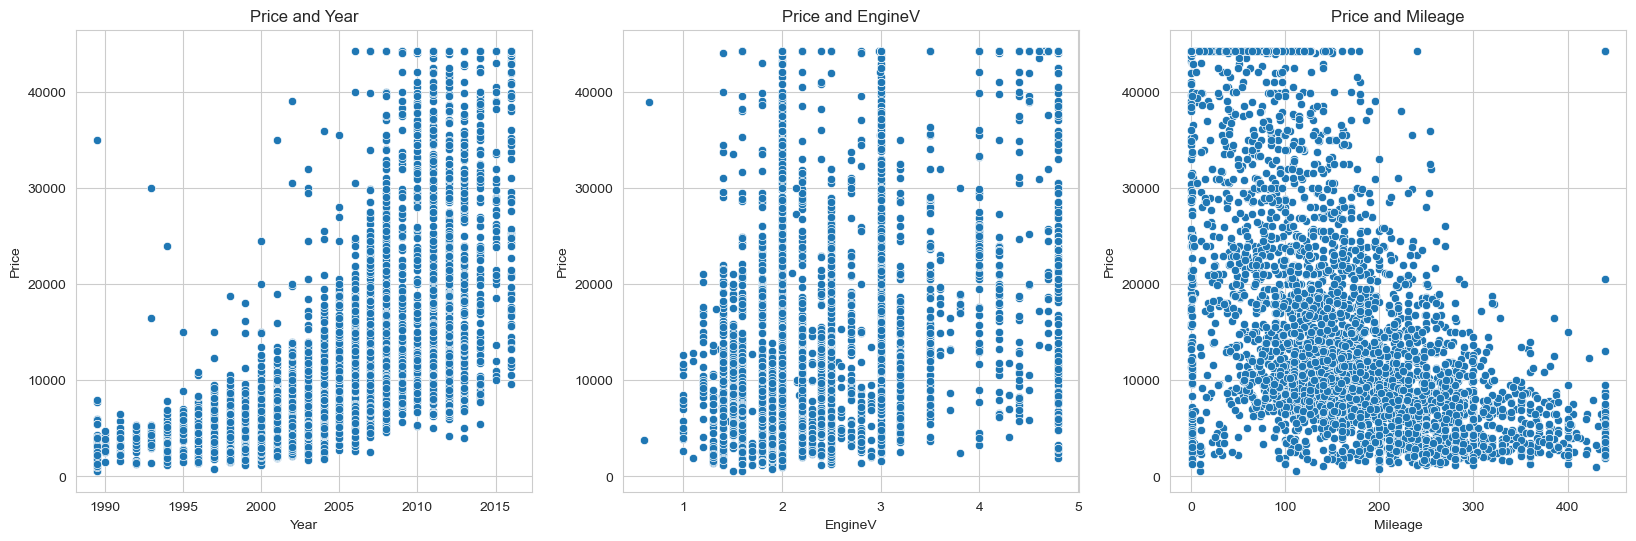

In [47]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='Year', y='Price', data=new_df)

plt.subplot(1,3,2)
plt.title("Price and EngineV")
sns.scatterplot(x='EngineV', y='Price', data=new_df)

plt.subplot(1,3,3)
plt.title("Price and Mileage")
sns.scatterplot(x='Mileage', y='Price', data=new_df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6080\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

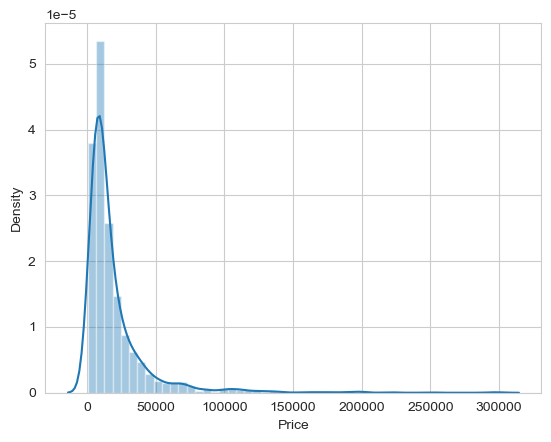

In [48]:
sns.distplot(df['Price'])

# Making Data linear - Log Transformation

In [49]:
log_price= np.log(new_df['Price'])
new_df['log_price']=log_price

<Axes: title={'center': 'Price and Mileage'}, xlabel='Mileage', ylabel='log_price'>

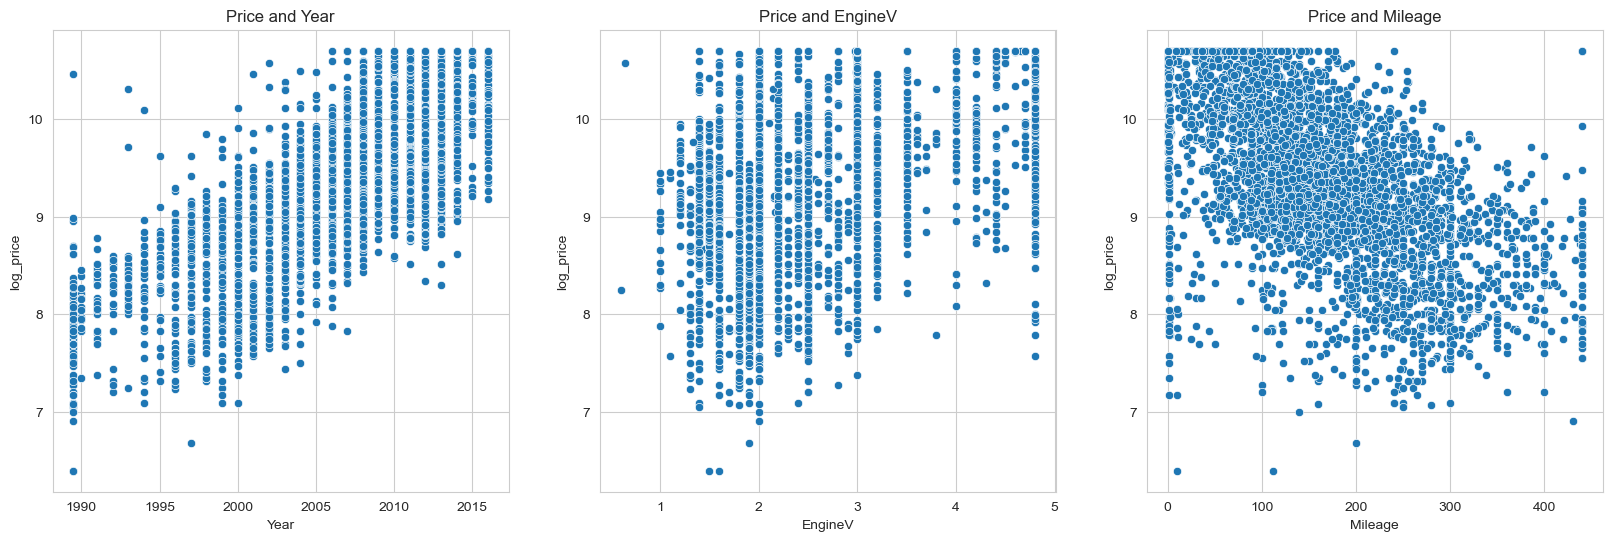

In [50]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='Year', y='log_price', data=new_df)

plt.subplot(1,3,2)
plt.title("Price and EngineV")
sns.scatterplot(x='EngineV', y='log_price', data=new_df)

plt.subplot(1,3,3)
plt.title("Price and Mileage")
sns.scatterplot(x='Mileage', y='log_price', data=new_df)

In [51]:
new_df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277.0,2.0,Petrol,yes,1991.0,8.342840
1,Mercedes-Benz,7900.0,van,427.0,2.9,Diesel,yes,1999.0,8.974618
2,Mercedes-Benz,13300.0,sedan,358.0,4.8,Gas,yes,2003.0,9.495519
3,Audi,23000.0,crossover,240.0,4.2,Petrol,yes,2007.0,10.043249
4,Toyota,18300.0,crossover,120.0,2.0,Petrol,yes,2011.0,9.814656
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35.0,1.6,Petrol,yes,2014.0,9.792556
4340,Mercedes-Benz,44251.5,sedan,9.0,3.0,Diesel,yes,2014.0,10.697645
4341,BMW,6500.0,sedan,1.0,3.5,Petrol,yes,1999.0,8.779557
4342,BMW,8000.0,sedan,194.0,2.0,Petrol,yes,1989.5,8.987197


# Checking for Most Contributed Features

In [52]:
from sklearn.preprocessing import LabelEncoder

for col in new_df.columns:
    if new_df[col].dtypes == 'object':
        encoder = LabelEncoder()
        new_df[col] = encoder.fit_transform(new_df[col])

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
x = new_df.drop('log_price',axis=1)
y = new_df['log_price']
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

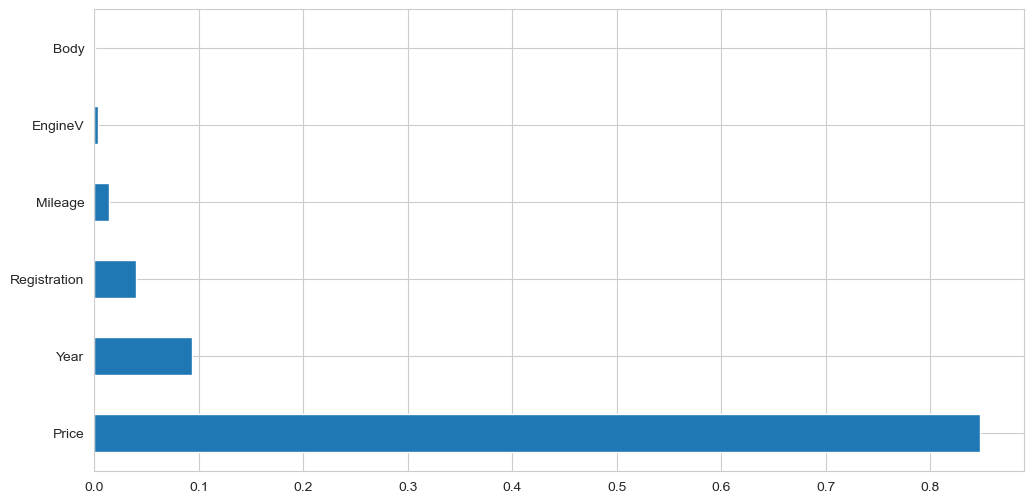

In [54]:
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

# Handling Categorical Values

In [55]:
data_with_dummies = pd.get_dummies(new_df,drop_first=True)

In [56]:
data_with_dummies

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,1,4200.0,3,277.0,2.0,3,1,1991.0,8.342840
1,2,7900.0,5,427.0,2.9,0,1,1999.0,8.974618
2,2,13300.0,3,358.0,4.8,1,1,2003.0,9.495519
3,0,23000.0,0,240.0,4.2,3,1,2007.0,10.043249
4,5,18300.0,0,120.0,2.0,3,1,2011.0,9.814656
...,...,...,...,...,...,...,...,...,...
4339,5,17900.0,3,35.0,1.6,3,1,2014.0,9.792556
4340,2,44251.5,3,9.0,3.0,0,1,2014.0,10.697645
4341,1,6500.0,3,1.0,3.5,3,1,1999.0,8.779557
4342,1,8000.0,3,194.0,2.0,3,1,1989.5,8.987197


# Model Development

In [57]:
x = data_with_dummies.drop('log_price',axis=1)
y = data_with_dummies['log_price']

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

# Linear Regression Model

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r_squared = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.9305990122586537
RMSE : 0.22444927969480233


# Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.9999943838879842
RMSE : 0.0020190788099223125
